In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
np.random.seed(322)
fraud_df = pd.read_csv('/content/drive/MyDrive/creditcard_2023.csv')

In [43]:
#x = fraud_df.drop(['id','Class'],axis=1).values
y = fraud_df.Class.values
x = fraud_df.iloc[:,1:29].values
#x = fraud_df.iloc[:,12:14].values
z = fraud_df.iloc[:,12:14].values
print(z)

[[ 0.2934381  -0.94138613]
 [ 1.56424577  0.57407401]
 [ 0.65920066  0.80517319]
 ...
 [-0.46184889 -0.60609963]
 [ 0.33521507  0.46417742]
 [-1.1530113   0.48919666]]


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.3)
#x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.9999)

In [16]:
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)
z_train_std = StandardScaler().fit_transform(z_train)
z_test_std = StandardScaler().fit_transform(z_test)

In [50]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(x)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.fit_transform(x_test_std)
print(x_train_pca)

[[-1.62361224e+00 -4.29891715e-01]
 [ 2.31835687e+00 -4.58796376e-01]
 [ 1.83665694e+00 -1.05457350e-03]
 ...
 [ 2.29712265e+00  1.84526138e-01]
 [ 3.13264526e+00 -7.41776171e-01]
 [ 1.97404509e+00  4.07618438e-02]]


training Perceptron
training Perceptron2
training Perceptron3


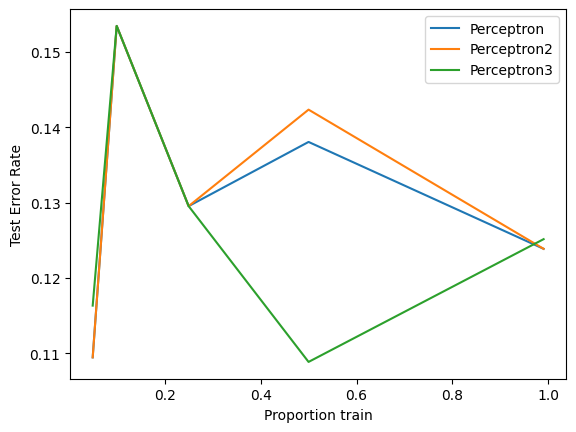

In [52]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import (
    LogisticRegression,
    Perceptron
)
from sklearn.model_selection import train_test_split

heldout = [0.95, 0.90, 0.75, 0.50, 0.01]
# Number of rounds to fit and evaluate an estimator.
rounds = 10

classifiers = [
    ("Perceptron", Perceptron(max_iter=110, eta0=1)),
    ("Perceptron2", Perceptron(max_iter=110, eta0=2)),
    ("Perceptron3", Perceptron(max_iter=110,  eta0=0.5))
]

xx = 1.0 - np.array(heldout)

for name, clf in classifiers:
    print("training %s" % name)
    rng = np.random.RandomState(42)
    yy = []
    for i in heldout:
        yy_ = []
        for r in range(rounds):
            X_train, X_test, y_train, y_test = train_test_split(
                x_pca, y, test_size=i, random_state=rng
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            yy_.append(1 - np.mean(y_pred == y_test))
        yy.append(np.mean(yy_))
    plt.plot(xx, yy, label=name)

plt.legend(loc="upper right")
plt.xlabel("Proportion train")
plt.ylabel("Test Error Rate")
plt.show()

In [27]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Perceptron

clf = Perceptron(max_iter=100, alpha=0.001)
clf.fit(x_train_pca, y_train)

Perceptron(alpha=0.001, max_iter=100)

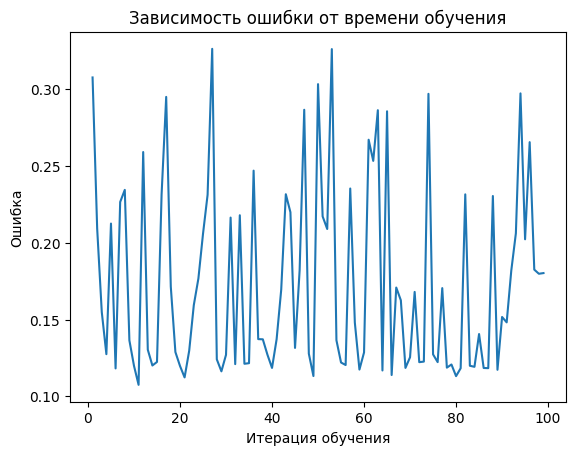

In [38]:
y_pred=clf.predict(x_test_pca)
errors = []
for i in range(1, 100):  # Итерируемся по количеству итераций
    clf.partial_fit(x_train_pca, y_train, classes=np.unique(y_train))
    errors.append((clf.predict(x_train_pca) != y_train).mean())  # Записываем долю неправильных ответов

plt.plot(range(1, 100), errors)
plt.xlabel('Итерация обучения')
plt.ylabel('Ошибка')
plt.title('Зависимость ошибки от времени обучения')
plt.show()